# Name -  Datamites Certified Data Scientist Course
# Batch - 1st March 2021 

### Project : II

#### Team ID - 1144
#### Project ID - HousePricePred

###### The datafields in the dataset are as follows :- 
* SalePrice - the property's sale price in dollars. This is the target variable that the team is trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Problem Statement :- The target is to predict the property sale price i.e to predict the housing price in the said area / region.

#### Regression Analysis will be done on the dataset with multiple possibilities in order to achieve the best results. Thus, the sale price would be the target (y) variable.

* The regression algorithms to be used in this research are :-
* 1. XGBoost Regression

#### Steps involved in the building a typical data science project is as follows :-

* 1. Data Analysis
* 2. Feature Engineering
* 3. Feature Selection
* 4. Model Building
* 5. Conclusion

#### Import the standard packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor # model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

pd.options.display.max_columns = None 
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

#### Load the data
###### Check for the first few records

In [3]:
data = pd.read_csv('data.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 1. Exploratory Data Analysis

#### Data Exploration

* Explore the dimensions of the data
* Identification of variables and data types 
* Describing the data
* Check for null values
* Explore the relationship between null vales and target variable
* Explore more about datatypes (categorical, numerical etc)
* Explore more about the datatypes and its relatiohship with target variable

In [4]:
# Dimension of the data

data.shape

(1460, 81)

##### * Dataset contains 1460 rows and 81 columns
##### * First row of the dataset is 'id' which may indicate the record or row number of the dataset 

In [5]:
# Understand the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### * From the information about the dataset, we can observe that :-
* Many features are categorical 
* Many features have not null values as 1460 i.e. the total number of rows in the datasset
* Some of the features (ex. Alley : 91, PoolQC : 7) has less than 1460 not null rows 

##### * The dataset is of mixed type features containing both categorical and numerical featues.
#####  * It also contains some features with null values.

In [6]:
# Describe the data

data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

##### * Considering that the data contains many null values, above description of the dataset is subject to change.

#### Analysis of Missing / Null values

In [7]:
# Check for null value count

data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# Check for null value percentage

data.isnull().sum() / 1460 * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
# Cross checking about the null values

data.isnull().values.any()

True

In [10]:
# Find out the column names and count of columns with null values

null_col = data.columns[data.isnull().any()]
print("Total number of features with null values are -", len(null_col))
null_col

Total number of features with null values are - 19


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

##### * From above result, we can observe that :-

* Dataset contains 19 features with null values such as :-

<img src="Null_values_1020.PNG" width="450">

* Null values will be deleted or converted into mean / mode etc in the next section - Feature Engineering
* More exploration is required to understand the relathioship between feature containing null values and the target variable

#### Create a copy (data_1) of original dataset in order to analyze and vizualize the data alongwith the null values

In [12]:
data_1 = data.copy()
data_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Missing values and categorical feature analysis on the new dataset - data_1

In [13]:
# Exploring more about categorical features for null values (independent variables with null values)

categorical_features_null = [feature for feature in data_1.columns if ((data_1[feature].dtypes == 'O') & (data_1[feature].isnull().sum()>=1))]
print("The number of categorical features containing null values are ", len(categorical_features_null) )
categorical_features_null

The number of categorical features containing null values are  16


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### We can observe that there are 16 categorical features with null values
##### Let us fill all the null values with 'Actualnull' in the categorical features in order to understand them in better way and their relationship with target variable
##### This is just to analyze the data in a better way and is a temporary arrangement

In [14]:
data_1.Alley.fillna('Actualnull' , inplace = True) # This Actualnull is actually a nan value
data_1.MasVnrType.fillna('Actualnull' , inplace = True)
data_1.BsmtQual.fillna('Actualnull' , inplace = True)
data_1.BsmtCond.fillna('Actualnull' , inplace = True)
data_1.BsmtExposure.fillna('Actualnull' , inplace = True)
data_1.BsmtFinType1.fillna('Actualnull' , inplace = True)
data_1.BsmtFinType2.fillna('Actualnull' , inplace = True)
data_1.Electrical.fillna('Actualnull' , inplace = True)
data_1.GarageType.fillna('Actualnull' , inplace = True)
data_1.GarageFinish.fillna('Actualnull' , inplace = True)
data_1.GarageQual.fillna('Actualnull' , inplace = True)
data_1.GarageCond.fillna('Actualnull' , inplace = True)
data_1.FireplaceQu.fillna('Actualnull' , inplace = True)
data_1.PoolQC.fillna('Actualnull' , inplace = True)
data_1.Fence.fillna('Actualnull' , inplace = True)
data_1.MiscFeature.fillna('Actualnull' , inplace = True)

In [15]:
# Checking if the null values are actually replaced

data_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street       Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Actualnull      Reg   
1   2          20       RL         80.0     9600   Pave  Actualnull      Reg   
2   3          60       RL         68.0    11250   Pave  Actualnull      IR1   
3   4          70       RL         60.0     9550   Pave  Actualnull      IR1   
4   5          60       RL         84.0    14260   Pave  Actualnull      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0  Actualnull   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3  

In [16]:
# Exploring more about categorical features, independent variables with null values - data_1

categorical_features = [feature for feature in data_1.columns if ((data_1[feature].dtypes == 'O'))]
print("The number of categorical features are ", len(categorical_features) )
categorical_features

The number of categorical features are  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
# Understanding more about the for classes in categorical_features :-

for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature, len(data_1[feature].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

In [18]:
# Understanding the unique categories in each categorical feature

for col in data_1.select_dtypes(include = ['object']).columns:
    print(col)
    print(data_1[col].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
['Actualnull' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 

In [19]:
# Understanding unique value count in each category

# Understanding the unique value count in each categorical feature

print(data_1.MSZoning.value_counts())
print('\n', data_1.Street.value_counts())
print('\n', data_1.Alley.value_counts())
print('\n', data_1.LotShape.value_counts())
print('\n', data_1.LandContour.value_counts())
print('\n', data_1.Utilities.value_counts())
print('\n', data_1.LotConfig.value_counts())
print('\n', data_1.LandSlope.value_counts())
print('\n', data_1.Neighborhood.value_counts())
print('\n', data_1.Condition1.value_counts())
print('\n', data_1.Condition2.value_counts())
print('\n', data_1.BldgType.value_counts())
print('\n', data_1.HouseStyle.value_counts())
print('\n', data_1.RoofStyle.value_counts())
print('\n', data_1.RoofMatl.value_counts())
print('\n', data_1.Exterior1st.value_counts())
print('\n', data_1.Exterior2nd.value_counts())
print('\n', data_1.MasVnrType.value_counts())
print('\n', data_1.ExterQual.value_counts())
print('\n', data_1.ExterCond.value_counts())
print('\n', data_1.Foundation.value_counts())
print('\n', data_1.BsmtQual.value_counts())
print('\n', data_1.BsmtCond.value_counts())
print('\n', data_1.BsmtExposure.value_counts())
print('\n', data_1.BsmtFinType1.value_counts())
print('\n', data_1.BsmtFinType2.value_counts())
print('\n', data_1.Heating.value_counts())
print('\n', data_1.HeatingQC.value_counts())
print('\n', data_1.CentralAir.value_counts())
print('\n', data_1.Electrical.value_counts())
print('\n', data_1.KitchenQual.value_counts())
print('\n', data_1.Functional.value_counts())
print('\n', data_1.FireplaceQu.value_counts())
print('\n', data_1.GarageType.value_counts())
print('\n', data_1.GarageFinish.value_counts())
print('\n', data_1.GarageQual.value_counts())
print('\n', data_1.GarageCond.value_counts())
print('\n', data_1.PavedDrive.value_counts())
print('\n', data_1.PoolQC.value_counts())
print('\n', data_1.Fence.value_counts())
print('\n', data_1.MiscFeature.value_counts())
print('\n', data_1.SaleType.value_counts())
print('\n', data_1.SaleCondition.value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 Pave    1454
Grvl       6
Name: Street, dtype: int64

 Actualnull    1369
Grvl            50
Pave            41
Name: Alley, dtype: int64

 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVi

##### * It can be observed that there is no categorical feature with single value in the dataset

### Understanding categorical data with the help of graphical visualization

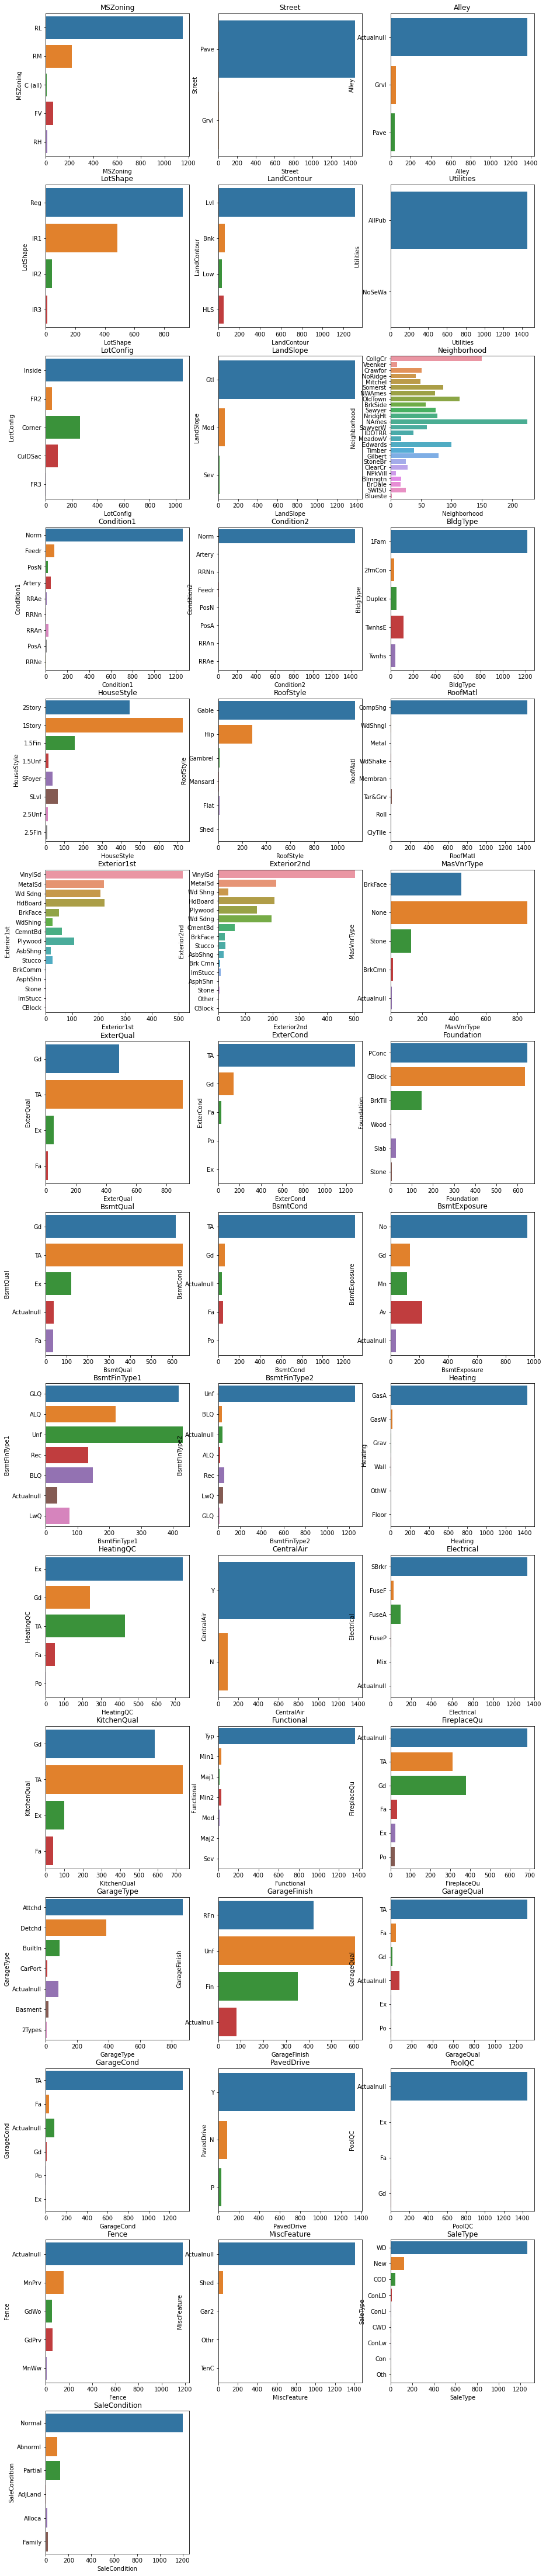

In [20]:
# Let us find categorical feature distribution with respect to the values in that feature

plt.figure(figsize = (15, 80), facecolor = 'white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(15, 3, plotnumber)
    sns.countplot(y = categorical_feature, data = data_1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### *  From the above graphical representation, it can be observed that :-

* Customers are interested in a particular zone, street as the values are very high in particular classes in these categories
* Similar is the case with LandContour, Utilities, LandSlope, Condition1, Condition2, BldgType, RoofStyle, RoofMatl, ExterCond
* Similar high values in one class in BsmtCond, BsmtExposure, BsmtFinType2, Heating, CentralAir, Electrical, Functional & SaleCondition
* Features like Alley, LotShape, Neighborhood, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, GarageType, GarageFinish, PoolQC, Fence - have notable values in other categories as well

* It can be observed that the null values are predominant in the features like poolquality where 99% are null values

#### Plotting the graph to understand the relationship of null value features with the target variable

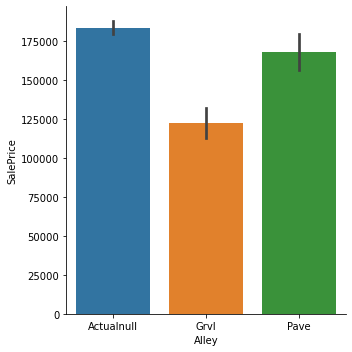

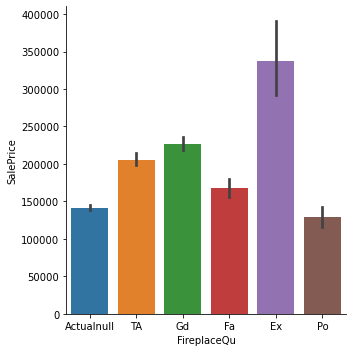

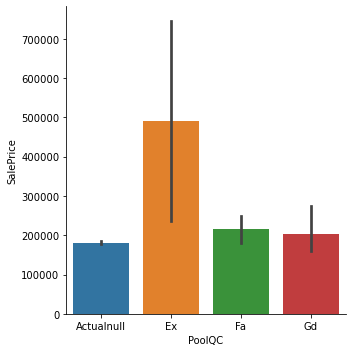

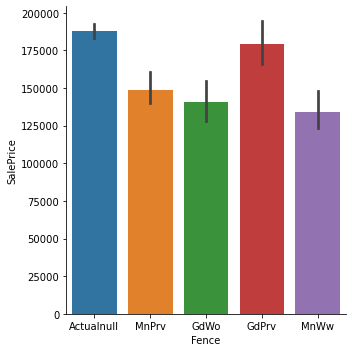

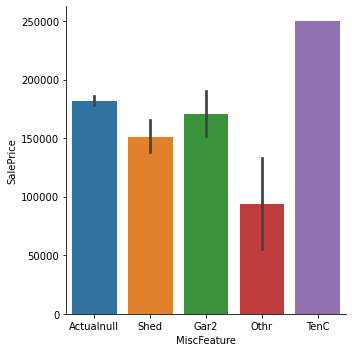

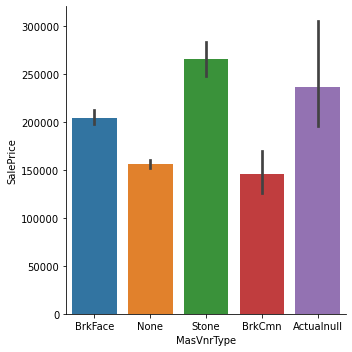

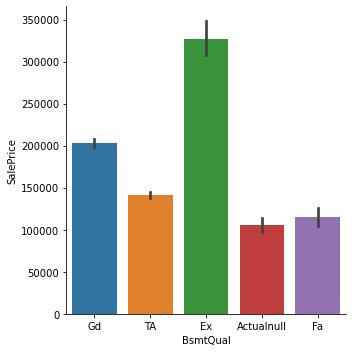

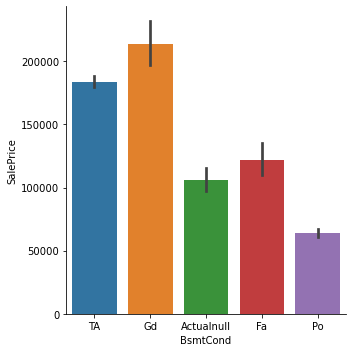

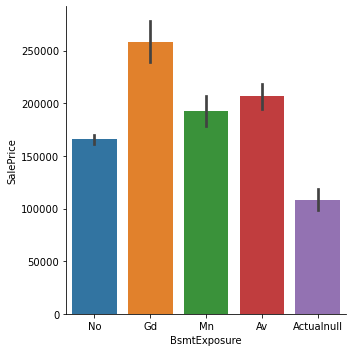

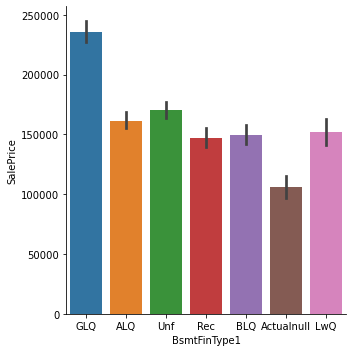

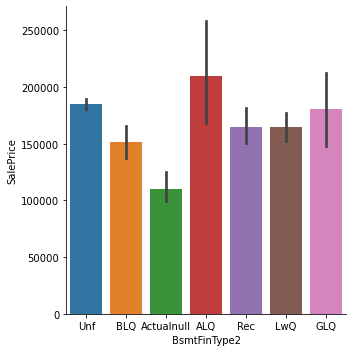

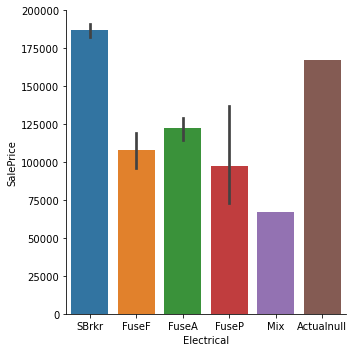

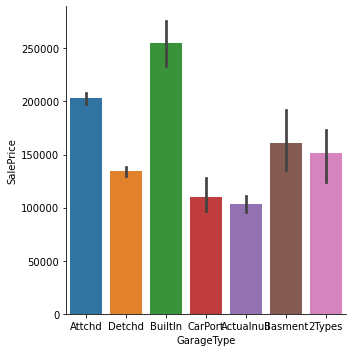

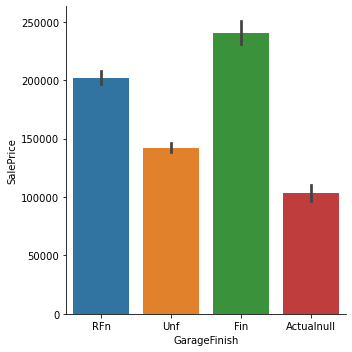

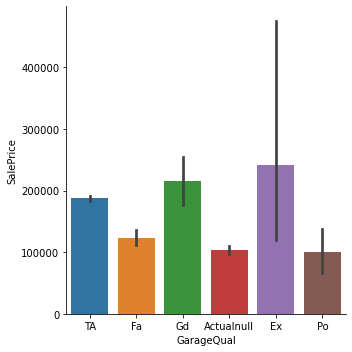

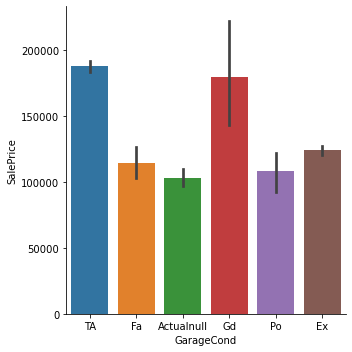

In [21]:
sns.catplot(x="Alley", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="FireplaceQu", y="SalePrice", kind="bar", data=data_1)
sns.catplot(x="PoolQC", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="Fence", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="MiscFeature", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="MasVnrType", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="BsmtQual", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="BsmtCond", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="BsmtExposure", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="BsmtFinType1", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="BsmtFinType2", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="Electrical", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="GarageType", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="GarageFinish", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="GarageQual", y="SalePrice", kind="bar", data=data_1) 
sns.catplot(x="GarageCond", y="SalePrice", kind="bar", data=data_1) 

##### * From the above graphical representation, it can be observed that :-

* All the 16 variable types containing null values are directly related to the target variable and the relationship is positive
* As the null value increases, the target varriable i.e. sale price of the house also increases
* The features with higher null values ex. 'Alley', 'PoolQC', 'Fence', 'MiscFeature' have high sale price

* It would be recommended to retain these features during the feature engineering and they would contribute to the overall performance of the model
* ALso, we can conclude that these are not really null values, but some common facilities, which may not be there on the property. Ex. Alley = None or PoolQc = None, means these features do not exist on the property

#### Let us plot the relationship of every categorical feature with the target variable

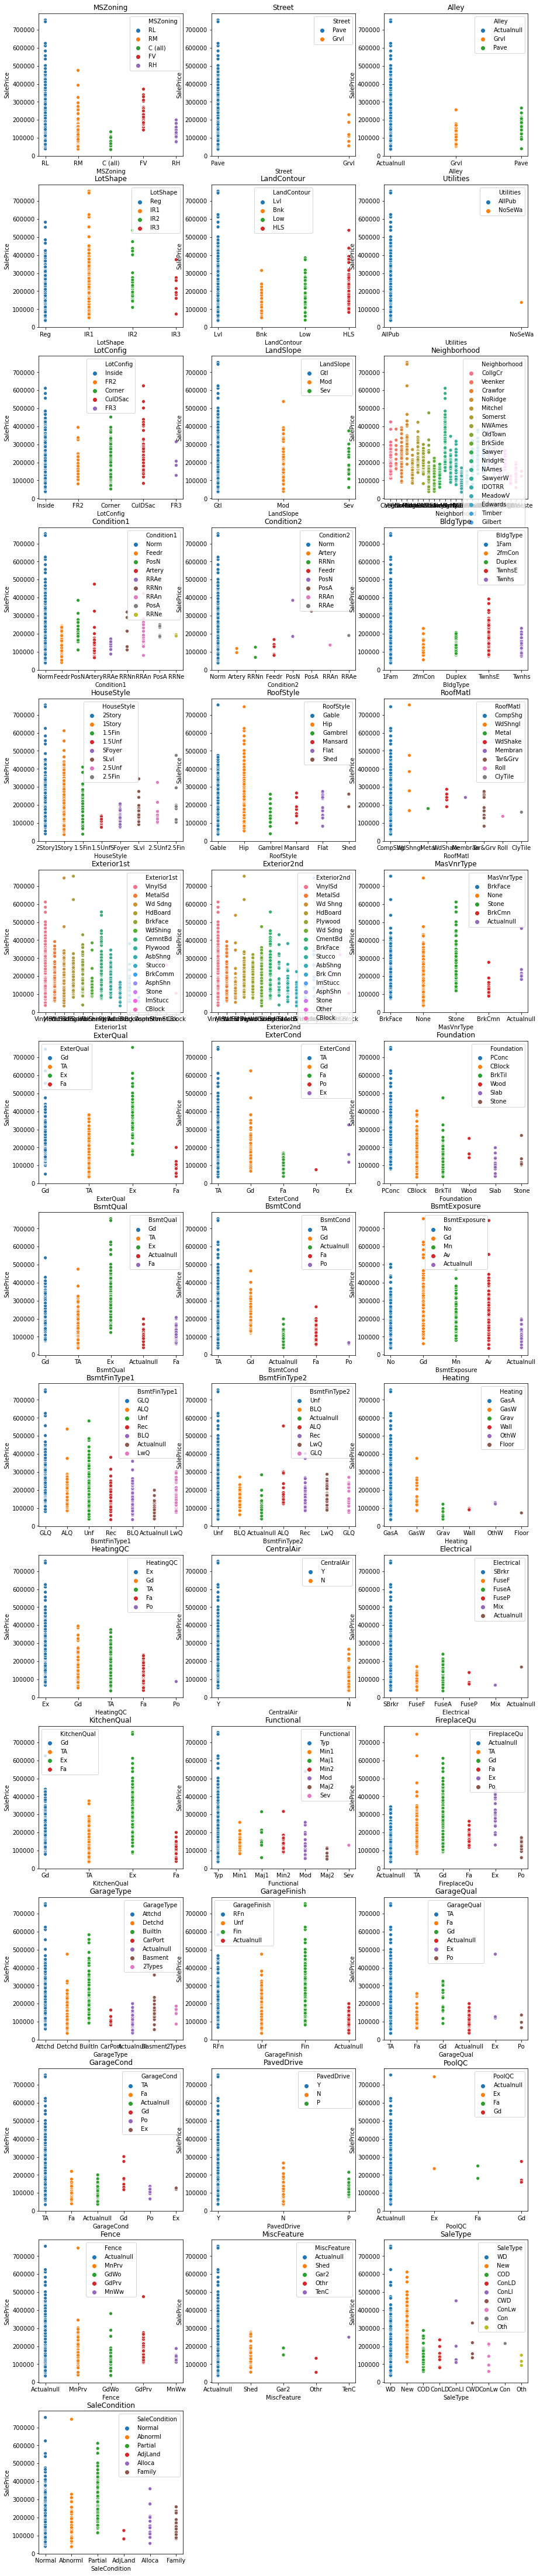

In [22]:
# Let us find categorical feature distribution with respect to the values in each feature and the target variable

plt.figure(figsize = (15, 80), facecolor = 'white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(15, 3, plotnumber)
    sns.scatterplot(x = categorical_feature, y = "SalePrice", hue =categorical_feature,  data = data_1) # palette = [col_wrap=4]
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### * We can observe that the relationship between the target variable (SalePrice) and the (independent) categorical variables is linear i.e. as the value of the variable increases, the sale price is also increasing, thus the condition of linearity is satisfied
* There are some outliers as well which will be required to be considered in the feature engineering section

#### * Understanding more about the outliers with the help of boxplots

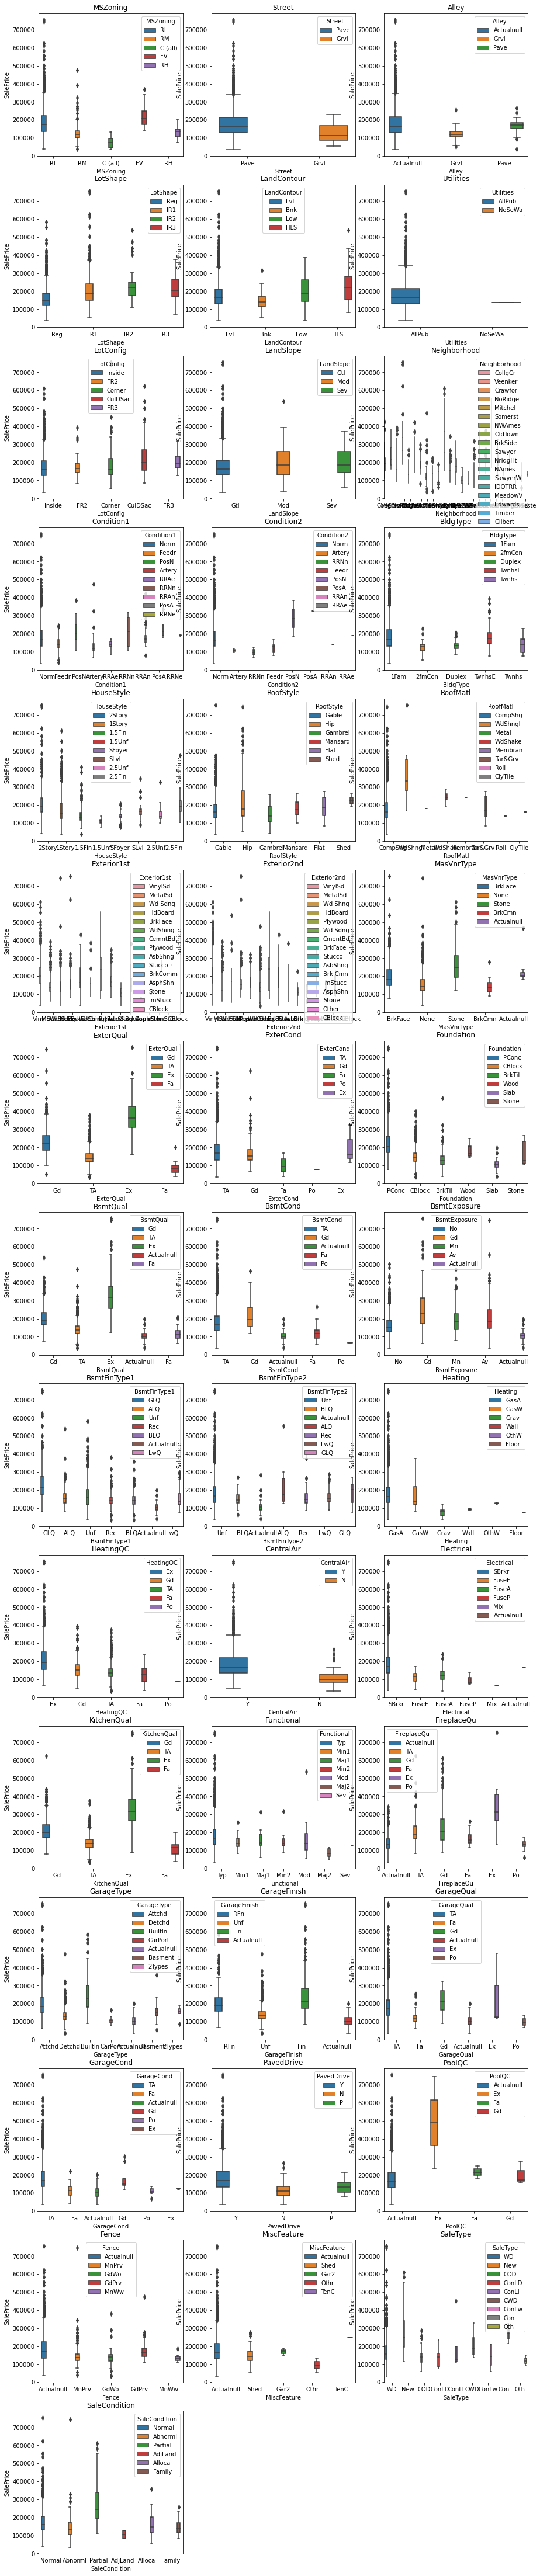

In [23]:
# Let us find categorical feature distribution with respect to the values in each feature

plt.figure(figsize = (15, 80), facecolor = 'white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(15, 3, plotnumber)
    sns.boxplot(x = categorical_feature, y = "SalePrice", hue =categorical_feature,  data = data_1) 
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

#### Missing values and numerical feature analysis on the original dataset - data

* We will use the original dataset here, as we may need to do the transformation in order to reduce the skewness of the data, if there is any skewness

#### Let us drop the ID column first

In [24]:
data = data.drop(['Id'], axis = 1)

In [25]:
data.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500

In [26]:
# Exploring more about numerical features with null values, independent variables

numerical_features_null = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (data[feature].isnull().sum()>=1))]
print("The number of Numerical features containing null values are ", len(numerical_features_null) )
numerical_features_null

The number of Numerical features containing null values are  3


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [27]:
# Exploring more about numerical features, independent variables

numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O'))]
print("The number of Numerical features are ", len(numerical_features) )
numerical_features

The number of Numerical features are  37


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [28]:
# Exploring more about Discrete NUmerical Features based on keywords in column names

year_features = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
print("Year feature count is {}".format(len(year_features)))
year_features

Year feature count is 4


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [29]:
# Exploring more about Discrete NUmerical Features

discrete_features = [feature for feature in numerical_features if (len(data[feature].unique())<25) & (feature not in year_features)]
print("Discrete feature count is {}".format(len(discrete_features)))
discrete_features

Discrete feature count is 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [30]:
# Exploring more about Continuous Numerical Features

continuous_features = [feature for feature in numerical_features if ((feature not in discrete_features) & (feature not in year_features))]
print("Continuous feature count is {}".format(len(continuous_features)))
continuous_features

Continuous feature count is 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### Understanding more about the 38 numerical variables using graphical visualization

### Temporal / Time related Variables

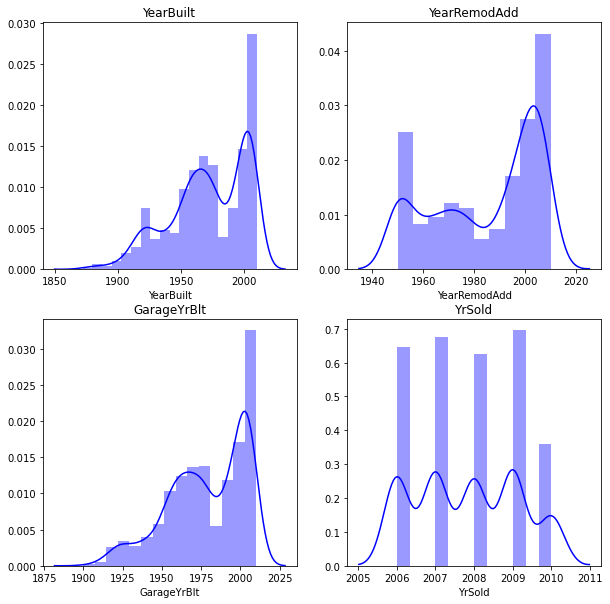

In [31]:
# For year feature (all in one code)

plt.figure(figsize = (10, 10), facecolor = 'white')
plotnumber = 1
for feature in year_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.distplot(data[feature], color = 'b')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

##### Let us understand the relationship of year features with the target variable SalePrice

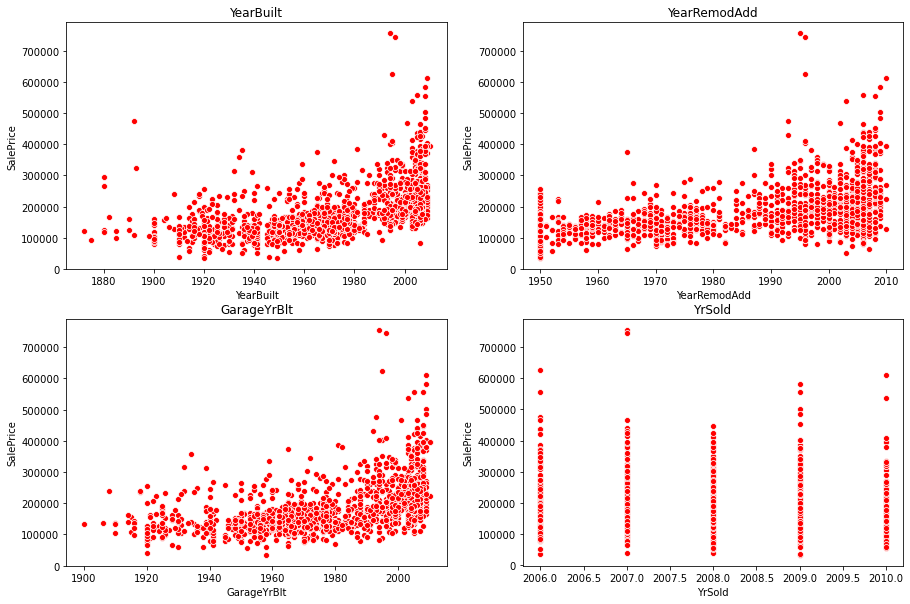

In [32]:
# Let us find year feature distribution with respect to the values in each feature and target variable

plt.figure(figsize = (15, 10), facecolor = 'white')
plotnumber = 1
for feature in year_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.scatterplot(x = feature, y = "SalePrice", data = data, color = 'r') 
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

### Discrete Features

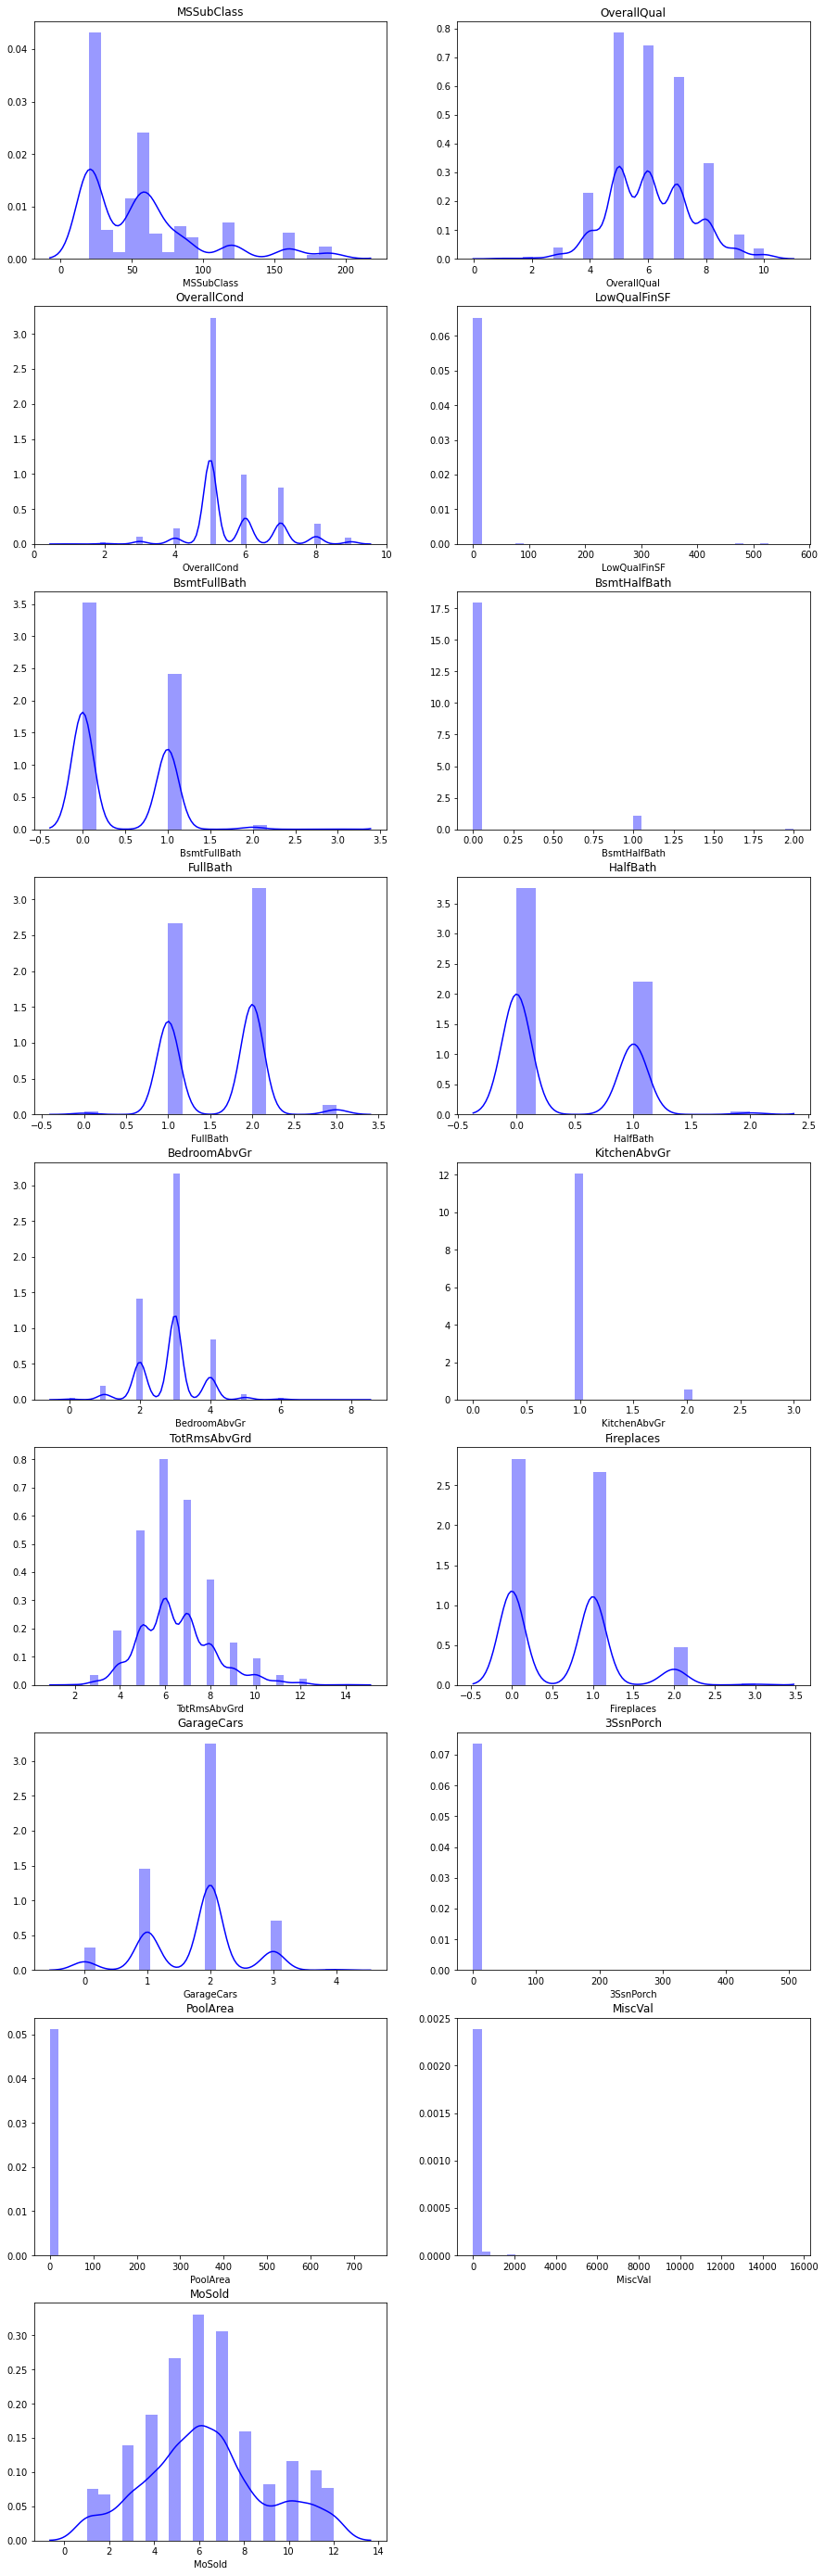

In [33]:
# For discrete feature (all in one code)

plt.figure(figsize = (15, 50), facecolor = 'white')
plotnumber = 1
for feature in discrete_features:
    ax = plt.subplot(9, 2, plotnumber)
    sns.distplot(data[feature], color = 'b')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

##### Let us understand the relationship of discrete features with the target variable SalePrice

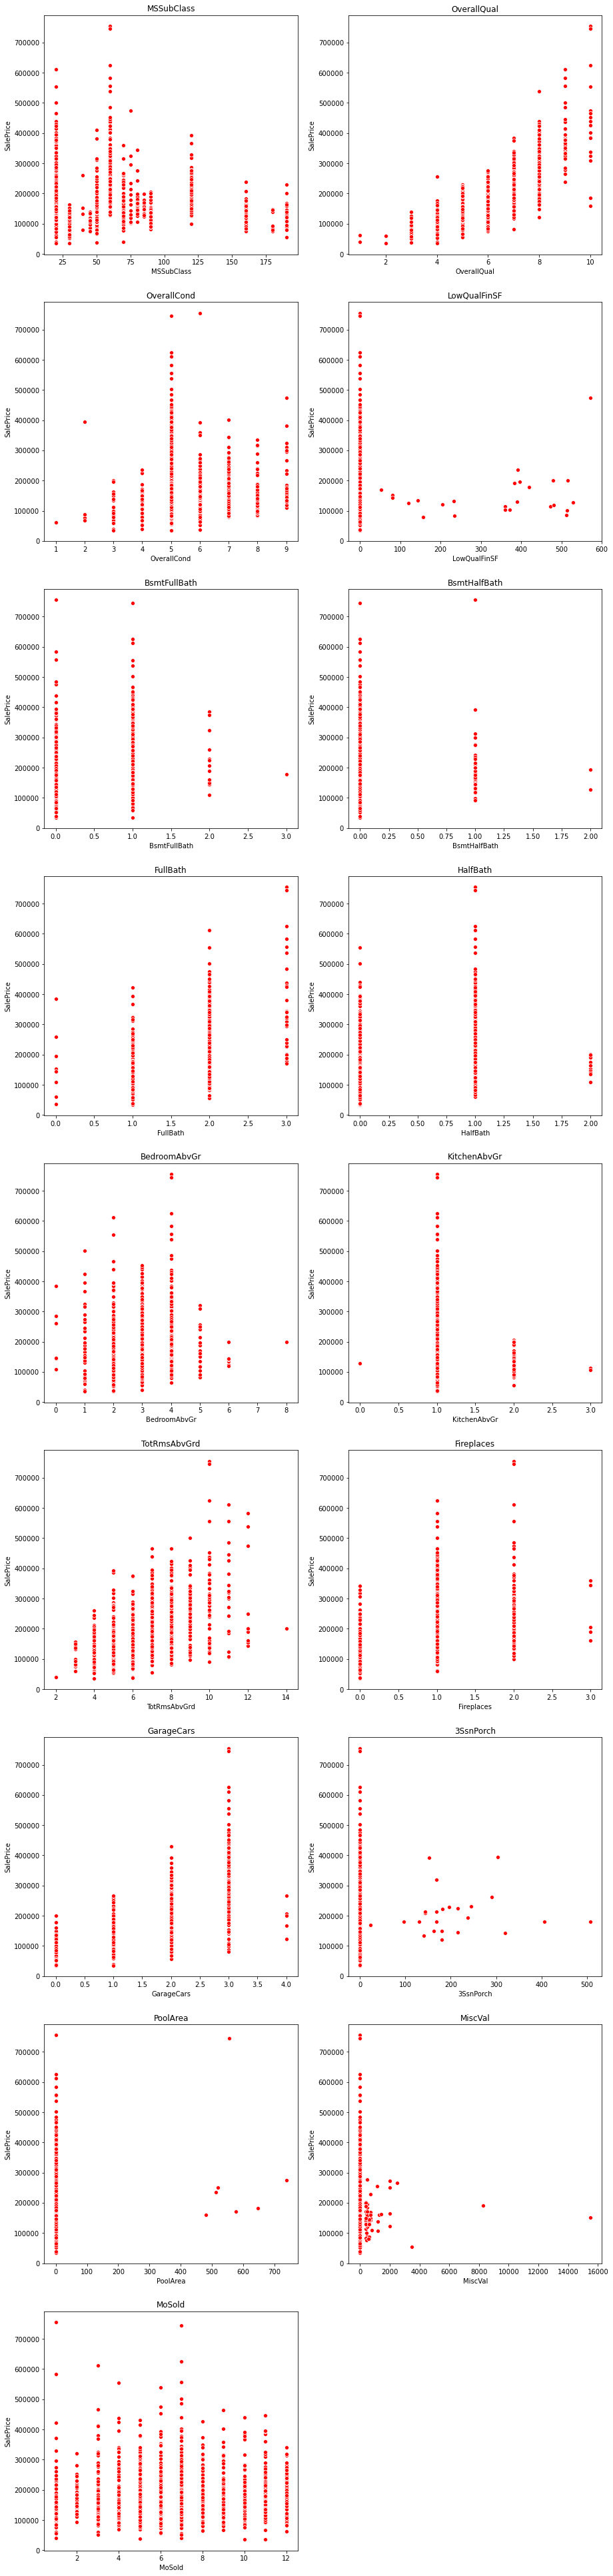

In [34]:
# Let us find discrete feature distribution with respect to the values in each feature

plt.figure(figsize = (15, 70), facecolor = 'white')
plotnumber = 1
for feature in discrete_features:
    ax = plt.subplot(9, 2, plotnumber)
    sns.scatterplot(x = feature, y = "SalePrice", data = data, color = 'r') 
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

### Continuous Features

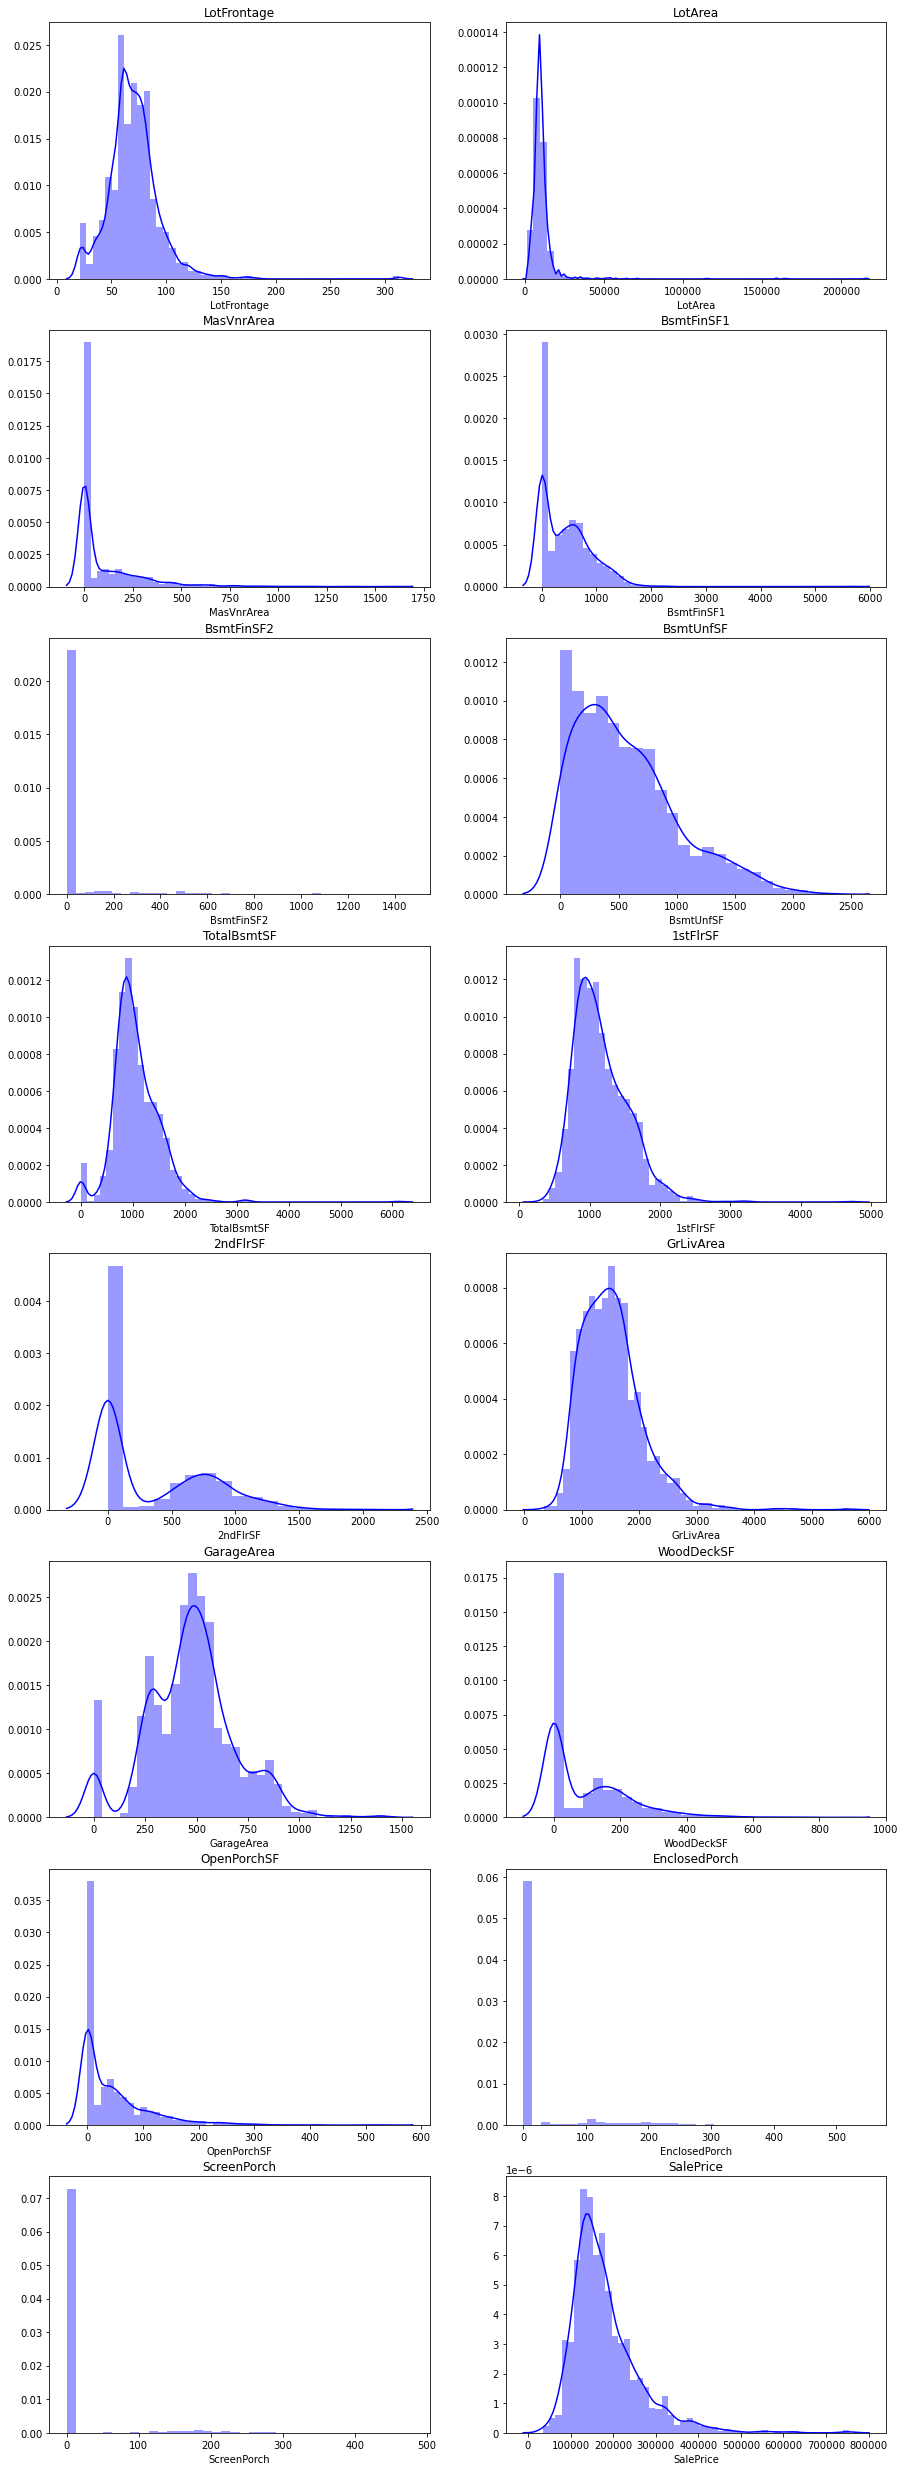

In [35]:
# For continuous feature (all in one code)

plt.figure(figsize = (15, 50), facecolor = 'white')
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(9, 2, plotnumber)
    sns.distplot(data[feature], color = 'b')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

#### Let us understand the relationship of continuous features with the target variable SalePrice

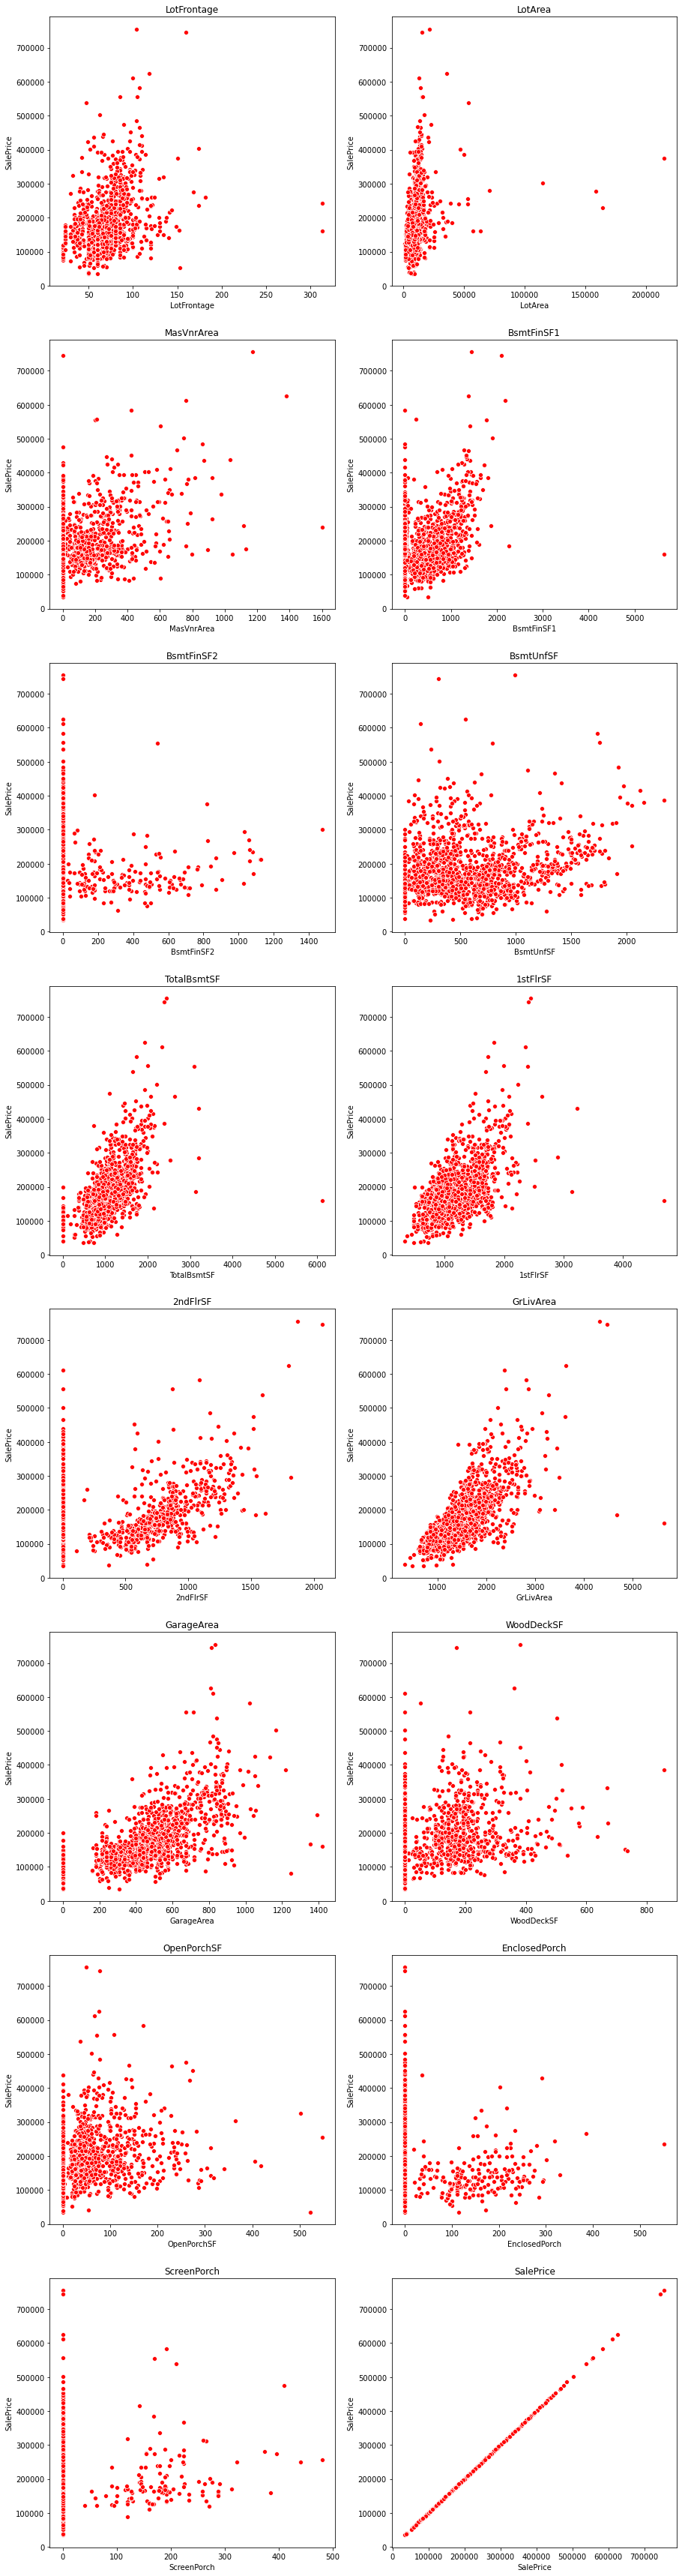

In [36]:
# Let us find continuous feature distribution with respect to the values in each feature

plt.figure(figsize = (15, 70), facecolor = 'white')
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(9, 2, plotnumber)
    sns.scatterplot(x = feature, y = "SalePrice", data = data, color = 'r') 
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

#### Exploratory data analysis ends here. The observations are as floows ;-

* Linearity is established by the analysis
* 19 Features contains null values
* All the features except ID contains direct and linear relationship with the target variable, either oderate or strong
* Standard range of target variable wrt all other variables seems to be till 450,000 and all the values beyond 450,000 and 600,000 and beyond are outliers
* We will built multiple models based on various features in order to come up with robust solution

## 2. Data  Preprocessing 

In [37]:
data.shape

(1460, 80)

In [38]:
data.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500

##### * Removing NaN values and replacing the values with something meaningful
##### * We will do it for each and every feature seperately

In [39]:
data.Alley  = data.Alley.fillna("NoAlley")
data.MasVnrType = data.MasVnrType.fillna(data.MasVnrType.mode()[0])
data.BsmtQual = data.BsmtQual.fillna("NoBsmnt")
data.BsmtCond = data.BsmtCond.fillna("NoBsmnt")
data.BsmtExposure = data.BsmtExposure.fillna("NoBsmnt")
data.BsmtFinType1 = data.BsmtFinType1.fillna("NoBsmnt")
data.BsmtFinType2 = data.BsmtFinType2.fillna("NoBsmnt")
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])
data.FireplaceQu  = data.FireplaceQu.fillna("NoFireplace")
data.GarageType  = data.GarageType.fillna("NoGarage")
data.GarageFinish  = data.GarageFinish.fillna("NoGarage")
data.GarageQual  = data.GarageQual.fillna("NoGarage")
data.GarageCond  = data.GarageCond.fillna("NoGarage")
data.PoolQC  = data.PoolQC.fillna("NoPool")
data.Fence  = data.Fence.fillna("NoFence")
data.MiscFeature  = data.MiscFeature.fillna("None")
data.LotFrontage = data.LotFrontage.fillna(data.LotFrontage.median())
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median())
data.GarageYrBlt  = data.GarageYrBlt.fillna(data.GarageYrBlt.mode()[0])

In [40]:
data.isnull().values.any()

False

##### Now that the data is complete with meaningful values. let us map correlation heat map to strudy the dependency of numerical variables with each other and the target variable, SalePrice

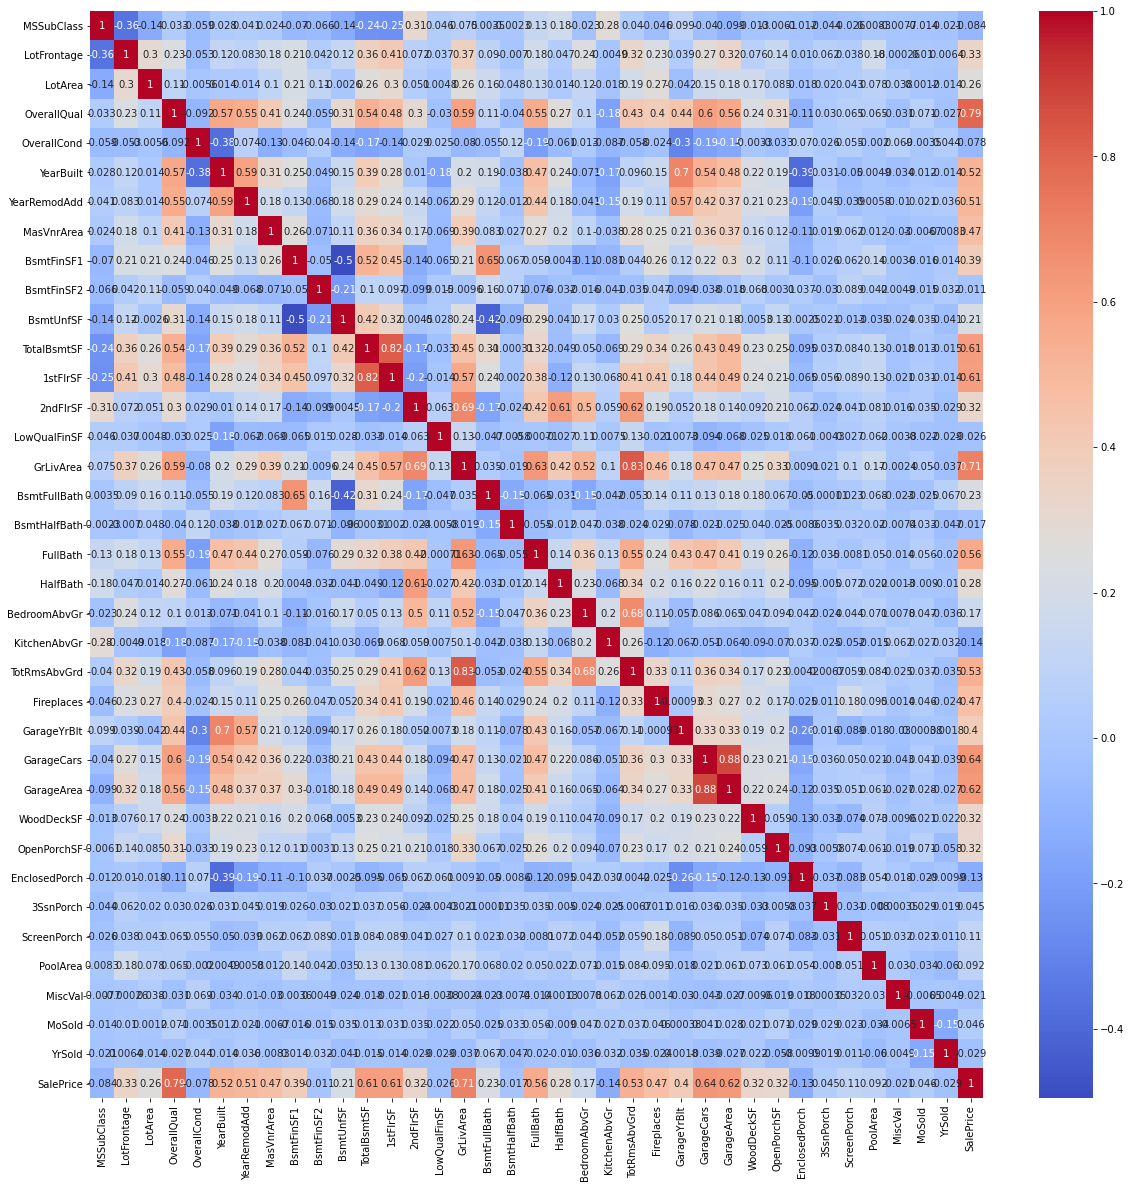

In [41]:
# Let us plot seaborm corelation heat map

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm") # cmap = "coolwarm"

#### Categorical variables into numerical variables - by replacing with relevant values

* Considering that many categorical variables are displaying a sequence or order, we will fill the numerical values accordingly
* We will replace the categories in the numbers of their sequence, in case of nominal data
* In case of ordinal data, 0 is the lowest and increases with category i.e. 0 is the lowest grade and 5 is the highest one

In [42]:
data.MSZoning.replace({"RL" :0 , "RM":1, "C (all)":2, "FV":3, "RH":4} ,inplace = True)
data.Street.replace({"Pave" :0 , "Grvl":1} ,inplace = True)
data.Alley.replace({"Pave" :0 , "Grvl":1, "NoAlley" :2} ,inplace = True) 
data.LotShape.replace({"Reg" :3, "IR1" :2 , "IR2":1, "IR3" :0} ,inplace = True) # This needs order, as ordinal data
data.LandContour.replace({"Lvl" :0, "Bnk" :1 , "Low":2, "HLS" :3} ,inplace = True)
data.Utilities.replace({"AllPub" :1, "NoSeWa" :0} ,inplace = True) # Ordinal
data.LotConfig.replace({"Inside" :0, "FR2" :1, "Corner" :2, "CulDSac" :3, "FR3" :4} ,inplace = True)
data.LandSlope.replace({"Gtl" :2, "Mod" :1, "Sev" :0} ,inplace = True) # Ordinal data
data.Neighborhood.replace({"CollgCr" :0, "Veenker" :1, "Crawfor" :2, "NoRidge" :3, "Mitchel" :4, "Somerst" :5, "NWAmes" :6,
                           "OldTown" :7,  "BrkSide" :8,  "Sawyer" :9, "NridgHt" :10, "NAmes" :11, "SawyerW" :12, "IDOTRR" :13,
                           "MeadowV" :14, "Edwards" :15, "Timber" :16, "Gilbert" :17, "StoneBr" :18, "ClearCr" :19, "NPkVill" :20,
                           "Blmngtn" :21, "BrDale" :22, "SWISU" :23, "Blueste" :25} ,inplace = True)
data.Condition1.replace({"Norm" :0, "Feedr" :1, "Artery" :2, "RRAn" :3, "PosN" :4, "RRAe" :5, "PosA" :6,
                         "RRNn" :7,  "RRNe" :8} ,inplace = True)
data.Condition2.replace({"Norm" :0, "Feedr" :1, "Artery" :2, "RRAn" :3, "PosN" :4, "RRAe" :5, "PosA" :6,
                         "RRNn" :7} ,inplace = True)
data.BldgType.replace({"1Fam" :0, "TwnhsE" :1, "Duplex" :2, "Twnhs" :3, "2fmCon" :4} ,inplace = True)
data.HouseStyle.replace({"1Story" :0, "2Story" :1, "1.5Fin" :2, "SLvl" :3, "SFoyer" :4, "1.5Unf" :5, "2.5Unf" :6,
                         "2.5Fin" :7} ,inplace = True)

data.RoofStyle.replace({"Gable" :0, "Hip" :1, "Gambrel" :2, "Mansard" :3, "Flat" :4, "Shed" :5} ,inplace = True)
data.RoofMatl.replace({"CompShg" :0, "Tar&Grv" :1, "WdShngl" :2, "WdShake" :3, "Roll" :4, "Metal" :5, "ClyTile" :6, "Membran" :7} ,inplace = True)

data.Exterior1st.replace({"VinylSd" :0, "HdBoard" :1, "MetalSd" :2, "Wd Sdng" :3, "Plywood" :4, "CemntBd" :5, "BrkFace" :6, "WdShing" :7, "Stucco" :8,
                         "AsbShng" : 9, "BrkComm" : 10, "Stone" : 11, "CBlock" :12, "ImStucc" :13, "AsphShn" :14} ,inplace = True)
data.Exterior2nd.replace({"VinylSd" :0, "MetalSd" :1, "Wd Shng" :2, "HdBoard" :3, "Plywood" :4, "Wd Sdng" :5, "CmentBd" : 6, "BrkFace" :7, "Stucco" :8,
                            "AsbShng" :9, "Brk Cmn" :10, "ImStucc" :11, "AsphShn" :12, "Stone" :13, "Other" :14, "CBlock" :15} ,inplace = True)


data.MasVnrType.replace({"None" :0, "BrkFace" :1, "Stone" :2, "BrkCmn" :3} ,inplace = True)

data.ExterQual.replace({"Gd" :3, "TA" :2, "Ex" :4, "Fa" :1} ,inplace = True) # Ordinal, in order to match with extrcond, skipped 0
data.ExterCond.replace({"Gd" :3, "TA" :2, "Ex" :4, "Fa" :1, "Po" :0} ,inplace = True) # Ordinal

data.Foundation.replace({"PConc" :0, "CBlock" :1, "BrkTil" :2, "Wood" :3, "Slab" :4, "Stone" :5} ,inplace = True)

data.BsmtQual.replace({"Gd" :4, "TA" :3, "Ex" :5, "Fa" :2, "NoBsmnt" :0} ,inplace = True) # Ordinal
data.BsmtCond.replace({"Gd" :4, "TA" :3, "Fa" :2, "Po" :1, "NoBsmnt" :0} ,inplace = True) # Ordinal
data.BsmtExposure.replace({"Gd" :4, "Av" :3, "Mn" :2, "No" :1, "NoBsmnt" :0} ,inplace = True) # Ordinal
data.BsmtFinType1.replace({"GLQ" :6, "ALQ" :5, "BLQ" :4, "Rec" :3, "LwQ" :2, "Unf" :1, "NoBsmnt" :0} ,inplace = True) # Ordinal
data.BsmtFinType2.replace({"GLQ" :6, "ALQ" :5, "BLQ" :4, "Rec" :3, "LwQ" :2, "Unf" :1, "NoBsmnt" :0} ,inplace = True) # Ordinal

data.Heating.replace({"GasA" :0, "GasW" :1, "Grav" :3, "Wall" :4, "OthW" :5, "Floor" :6} ,inplace = True) 
data.HeatingQC.replace({"Ex" :4, "Gd" :3, "TA" :2, "Fa" :1, "Po" :0} ,inplace = True) # Ordinal

data.CentralAir.replace({"Y" :1, "N" :0} ,inplace = True) 

data.Electrical.replace({"Mix" :0, "FuseP" :1, "FuseF" :2, "FuseA" :3, "SBrkr" :4} ,inplace = True) # Ordinal

data.KitchenQual.replace({"Gd" :2, "TA" :1, "Ex" :3, "Fa" :0} ,inplace = True) # Ordinal
data.Functional.replace({"Typ" :6, "Min1" :5, "Maj1" :4, "Min2" :3, "Mod" :2, "Maj2" :1, "Sev" :0} ,inplace = True) # Ordinal

data.FireplaceQu.replace({"Ex" :5, "Gd" :4, "TA" :3, "Fa" :2, "Po" :1, "NoFireplace" :0} ,inplace = True) # Ordinal

data.GarageType.replace({"NoGarage" :0, "Detchd" :1, "CarPort" :2, "BuiltIn" :3,  "Basment" :4, "Attchd" :5, "2Types" :6} ,inplace = True)
data.GarageFinish.replace({"Fin" :3, "RFn" :2, "Unf" :1, "NoGarage" :0} ,inplace = True) # Ordinal
data.GarageQual.replace({"Ex" :5, "Gd" :4, "TA" :3, "Fa" :2, "Po" :1, "NoGarage" :0} ,inplace = True) # Ordinal
data.GarageCond.replace({"Ex" :5, "Gd" :4, "TA" :3, "Fa" :2, "Po" :1, "NoGarage" :0} ,inplace = True) # Ordinal

data.PavedDrive.replace({"Y" :2, "P" :1, "N" :0} ,inplace = True) 
data.PoolQC.replace({"Ex" :3, "Gd" :2, "Fa" :1, "NoPool" :0} ,inplace = True) # Ordinal
data.Fence.replace({"GdPrv" :4, "MnPrv" :3, "GdWo" :2, "MnWw" :1, "NoFence" :0} ,inplace = True) # Ordinal


data.MiscFeature.replace({"None" :0, "TenC" :1, "Shed" :2, "Othr" :3, "Gar2" :4} ,inplace = True) # Ordinal


data.SaleType.replace({"WD" :0, "New" :1, "COD" :2, "ConLD" :3, "ConLI" :4, "CWD" :5, "ConLw" :6, "Con" :7, "Oth" :8} ,inplace = True)
data.SaleCondition.replace({"Normal" :0, "Abnorml" :1, "AdjLand" :2, "Alloca" :3, "Family" :4, "Partial" :5 } ,inplace = True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [49]:
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         0         65.0     8450       0      2         3   
1          20         0         80.0     9600       0      2         3   
2          60         0         68.0    11250       0      2         2   
3          70         0         60.0     9550       0      2         2   
4          60         0         84.0    14260       0      2         2   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          1          0          2             0           0   
1            0          1          1          2             1           1   
2            0          1          0          2             0           0   
3            0          1          2          2             2           0   
4            0          1          1          2             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           1            7            5       2003   
1           0         0           0            6            8       1976   
2           0         0           1            7            5       2001   
3           0         0           1            7            5       1915   
4           0         0           1            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0         0            0            0           1   
1          1976          0         0            2            1           0   
2          2002          0         0            0            0           1   
3          1970          0         0            3            2           0   
4          2000          0         0            0            0           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          3          2           0         4         3   
1         0.0          2          2           1         4         3   
2       162.0          3          2           0         4         3   
3         0.0          2          2           2         3         4   
4       350.0          3          2           0         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             1           0   
1             4             5         978             1           0   
2             2             6         486             1           0   
3             1             5         216             1           0   
4             3             6         655             1           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        0          4           1           4   
1        284         1262        0          4           1           4   
2        434          920        0          4           1           4   
3        540          756        0          3           1           4   
4        490         1145        0          4           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4      

* All the object datatypes are converted into integer or float datatypes

## 3. Feature Engineering

### Feature selection by Random Forest Technique

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [51]:
# Divide the data into independent and dependent variables 

rfc_x  = data.iloc[: , 0:-1]
rfc_y  = data.iloc[: , -1]

In [52]:
# Fit the complete data into the model to find out most important features

rfc.fit(rfc_x  , rfc_y)

RandomForestClassifier()

In [53]:
# Creating a dataframe for most important featues with respective scores

feature_importance_rfc = pd.DataFrame({ "Features":rfc_x.columns , "Importance"  : rfc.feature_importances_  })

In [54]:
feature_importance_rfc.sort_values('Importance'  ,   ascending= False )

Features  Importance
3         LotArea    0.037967
42       1stFlrSF    0.037021
45      GrLivArea    0.036918
36      BsmtUnfSF    0.035743
37    TotalBsmtSF    0.035179
61     GarageArea    0.034061
2     LotFrontage    0.032881
75         MoSold    0.030117
18      YearBuilt    0.029904
58    GarageYrBlt    0.029296
19   YearRemodAdd    0.028914
33     BsmtFinSF1    0.027839
66    OpenPorchSF    0.024678
65     WoodDeckSF    0.023753
11   Neighborhood    0.023127
76         YrSold    0.021973
25     MasVnrArea    0.021748
53   TotRmsAbvGrd    0.020544
43       2ndFlrSF    0.020120
22    Exterior1st    0.017433
23    Exterior2nd    0.017244
16    OverallQual    0.017093
32   BsmtFinType1    0.015510
17    OverallCond    0.015460
50   BedroomAbvGr    0.013262
0      MSSubClass    0.013090
31   BsmtExposure    0.012581
56    FireplaceQu    0.012333
59   GarageFinish    0.012291
39      HeatingQC    0.012143
6        LotShape    0.011483
9       LotConfig    0.011410
15     HouseStyle    0.011144
55     Fireplaces    0.010654
24     MasVnrType    0.010389
52    KitchenQual    0.009531
46   BsmtFullBath    0.009521
57     GarageType    0.009427
29       BsmtQual    0.009317
60     GarageCars    0.009157
67  EnclosedPorch    0.009028
78  SaleCondition    0.008865
72          Fence    0.008728
12     Condition1    0.008652
20      RoofStyle    0.008623
35     BsmtFinSF2    0.008334
28     Foundation    0.008252
69    ScreenPorch    0.007954
49       HalfBath    0.007499
34   BsmtFinType2    0.007365
77       SaleType    0.007267
26      ExterQual    0.006639
1        MSZoning    0.006516
30       BsmtCond    0.006516
7     LandContour    0.006411
48       FullBath    0.006248
27      ExterCond    0.006092
14       BldgType    0.005228
41     Electrical    0.004812
54     Functional    0.004723
62     GarageQual    0.004344
5           Alley    0.004007
63     GarageCond    0.003864
64     PavedDrive    0.003724
10      LandSlope    0.003719
47   BsmtHalfBath    0.003651
74        MiscVal    0.003384
68      3SsnPorch    0.003374
73    MiscFeature    0.002291
40     CentralAir    0.002086
44   LowQualFinSF    0.001875
38        Heating    0.001758
51   KitchenAbvGr    0.001672
21       RoofMatl    0.001589
13     Condition2    0.001197
4          Street    0.000515
71         PoolQC    0.000444
70       PoolArea    0.000409
8       Utilities    0.000094

#### Top 20 features using Random Forest Classifier technique are as follows :-

In [55]:
data2 = pd.DataFrame(data, columns = ['LotArea', 'GrLivArea', '1stFlrSF', 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF', 
                                       'LotFrontage', 'YearBuilt', 'MoSold', 'GarageYrBlt','BsmtFinSF1','YearRemodAdd', 
                                       'OpenPorchSF', 'WoodDeckSF', 'Neighborhood', 'MasVnrArea', 'YrSold', '2ndFlrSF', 
                                       'TotRmsAbvGrd', 'Exterior1st', 'SalePrice'])
data2.head(1)

LotArea  GrLivArea  1stFlrSF  GarageArea  BsmtUnfSF  TotalBsmtSF  \
0     8450       1710       856         548        150          856   

   LotFrontage  YearBuilt  MoSold  GarageYrBlt  BsmtFinSF1  YearRemodAdd  \
0         65.0       2003       2       2003.0         706          2003   

   OpenPorchSF  WoodDeckSF  Neighborhood  MasVnrArea  YrSold  2ndFlrSF  \
0           61           0             0       196.0    2008       854   

   TotRmsAbvGrd  Exterior1st  SalePrice  
0             8            0     208500

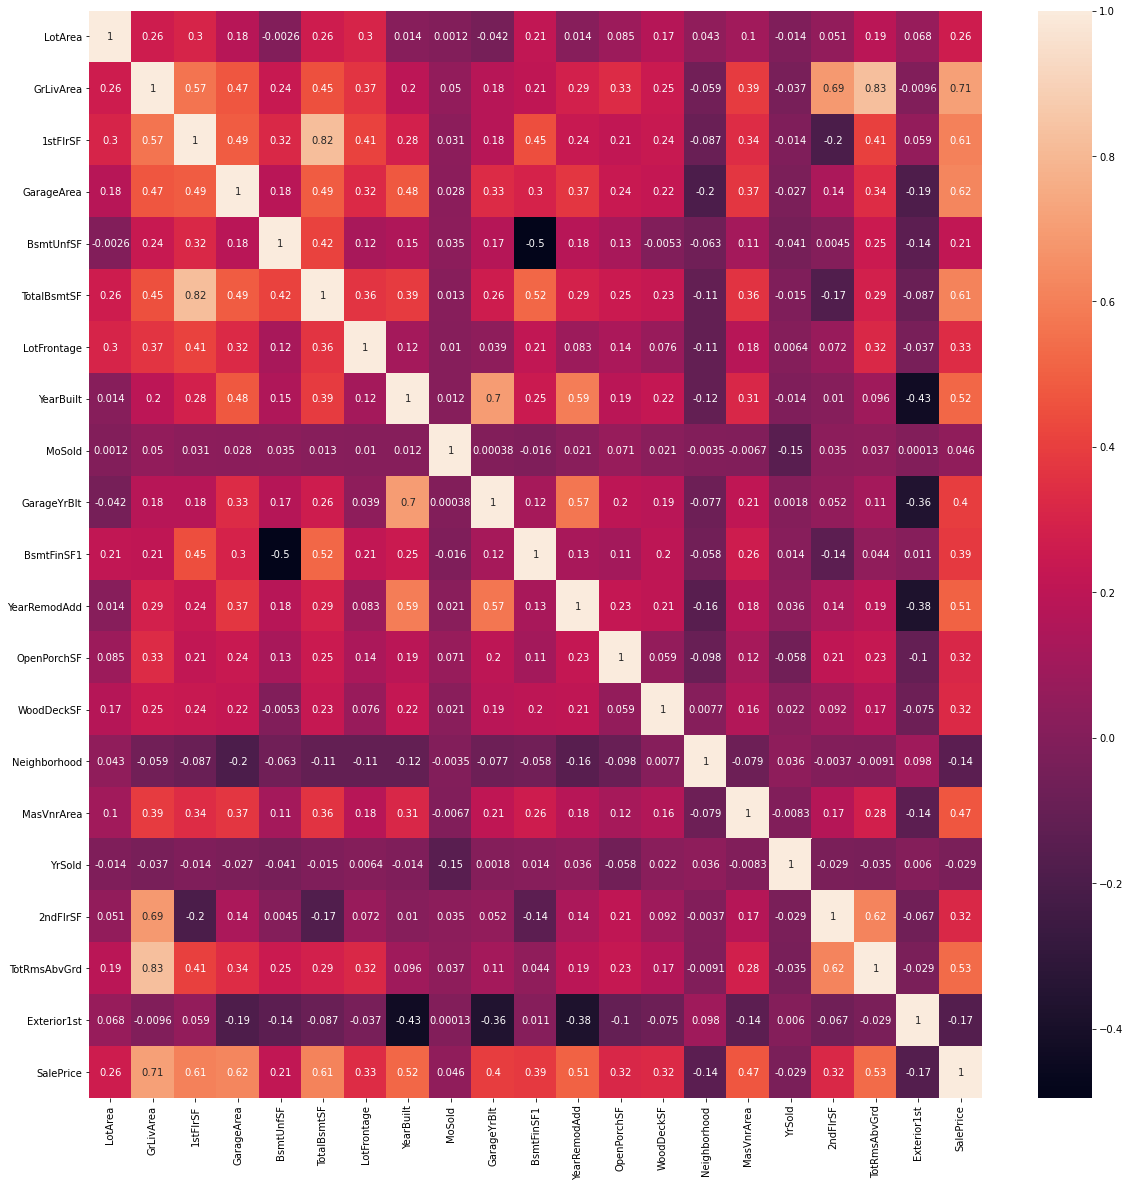

In [57]:
# Let us plot seaborm corelation heat map

plt.figure(figsize = (20,20))
sns.heatmap(data2.corr(), annot = True) 

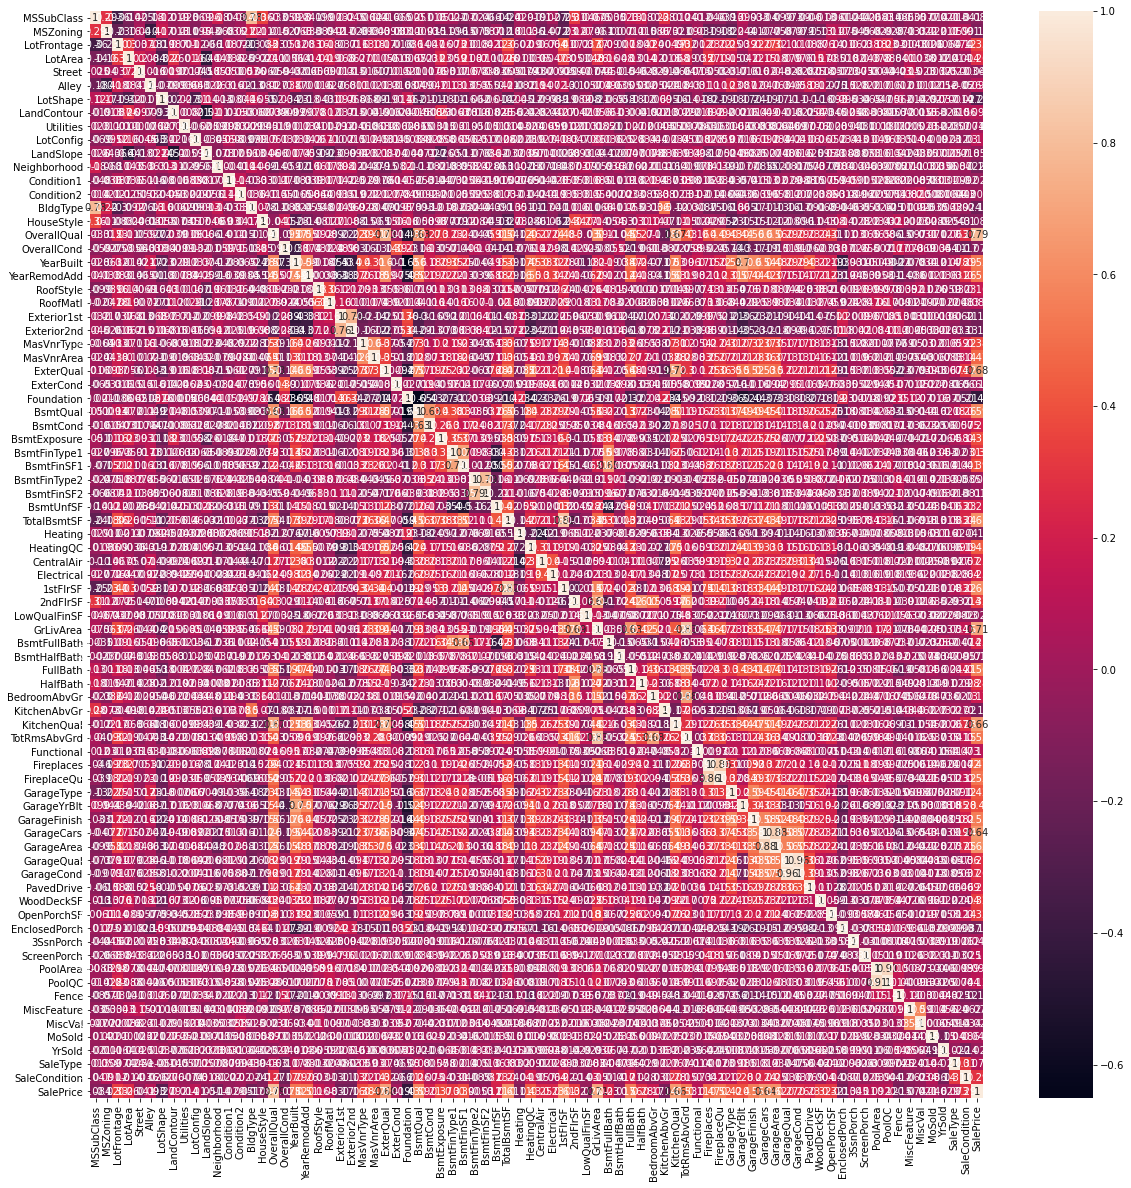

In [60]:
# Let us plot seaborm corelation heat map

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True) 

#### By considering both the techniques, Random Forest Classifier and Correlation Heatmap, following are the features to he used for model building :-

## 4. Model Building

#### Create a dataframe with required features

In [71]:
# top 20 features using Random Forest classifier and heatmap Feature Selection techniques

data = pd.DataFrame(data, columns = ['LotArea', 'GrLivArea', '1stFlrSF', 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF', 
                                       'LotFrontage', 'YearBuilt', 'MoSold', 'GarageYrBlt','BsmtFinSF1','YearRemodAdd', 
                                       'OpenPorchSF', 'WoodDeckSF', 'Neighborhood', 'MasVnrArea', 'OverallQual', '2ndFlrSF', 
                                       'TotRmsAbvGrd', 'Exterior1st', 'SalePrice'])
data.head(1)

LotArea  GrLivArea  1stFlrSF  GarageArea  BsmtUnfSF  TotalBsmtSF  \
0     8450       1710       856         548        150          856   

   LotFrontage  YearBuilt  MoSold  GarageYrBlt  BsmtFinSF1  YearRemodAdd  \
0         65.0       2003       2       2003.0         706          2003   

   OpenPorchSF  WoodDeckSF  Neighborhood  MasVnrArea  OverallQual  2ndFlrSF  \
0           61           0             0       196.0            7       854   

   TotRmsAbvGrd  Exterior1st  SalePrice  
0             8            0     208500

#### Divide the data into independent and dependent variables

In [77]:
X  = data.iloc[: , 0:-1]
Y  = data.iloc[: , -1]

X.shape
Y.shape

print("Shape of X is --", X.shape)
print("Shape of Y is --", Y.shape)

Shape of X is -- (1460, 20)
Shape of Y is -- (1460,)


#### Splitting the data into train and test

In [96]:
# Split the data in train and test 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=False) # 80% train, 20% test

X_train.shape
Y_train.shape
X_test.shape
Y_test.shape

print("X_train shape is --", X_train.shape)
print("Y_train shape is --", Y_train.shape)
print("X_test shape is --",  X_test.shape)
print("Y_test shape is --",  Y_test.shape)

X_train shape is -- (1168, 20)
Y_train shape is -- (1168,)
X_test shape is -- (292, 20)
Y_test shape is -- (292,)


#### Declare the model, train and fit the model, predict, find the metrics and visualization

r2 score is --> 0.9011810187992726
Mean Absolute Error is --> 16644.637628424658
Mean Squared Error is --> 624738089.6156006
Root Mean Squared Error is --> 24994.761243420602
Adjusted Rsquare for XGBoost Regressor with top 20 features is -->  0.9992570064032097
Max score using CV is -->  0.9160971383030946
Array of CV is -->  [0.83934406 0.91609714 0.8632993  0.88370896 0.79593575 0.85358462
 0.73047295]


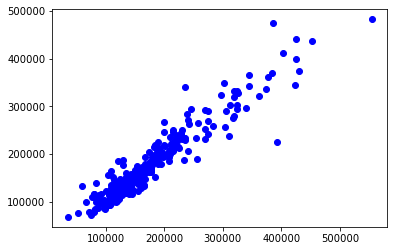

In [97]:
model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 5,
        min_child_weight = 5,
        n_estimators = 1000,
        subsample = 0.7,
        random_state = 30)


model.fit( X_train, Y_train )

Y_predict = model.predict(X_test)

r2_model = r2_score(Y_test, Y_predict)
print("r2 score is -->", r2_model)

MAE = mean_absolute_error(Y_test, Y_predict)
print("Mean Absolute Error is -->", MAE )

MSE = mean_squared_error(Y_test, Y_predict)
print("Mean Squared Error is -->", MSE )

RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is -->", RMSE )

#Rsquare = model.score(X_train, Y_train)
#print("R Squared is -->", Rsquare )

# Adjusted Rsquare

# 1 - [(1 - Rsquare) * (N-1) / (N - K - 1)]

N = X_train.shape [0]

K = X_train.shape[1]

Rsquare = model.score(X_train, Y_train)

AdjRsquare = 1 - (1 - Rsquare) * (N-1) / (N - K - 1)

print("Adjusted Rsquare for XGBoost Regressor with top 20 features is --> ", AdjRsquare)

scores_model = cross_val_score(model , X_train, Y_train , cv = 7)
CV_Max_model = scores_model.max()
print("Max score using CV is --> ", CV_Max_model)
print("Array of CV is --> ", scores_model)


# Visualization

plt.scatter(Y_test, Y_predict, color = 'b')

### The model performance with reduced number of features is coming as -- r2 score = 0.9011810187992726

## Export the model

### Exporting the model with joblib

Joblib is a set of tools to provide lightweight pipelining in Python,Joblib is optimized to be fast and robust in particular on large data and has specific optimizations for numpy arrays.

In [99]:
import joblib 

joblib.dump(model,'HousePricePred_model.pkl') # .pkl pickle

['HousePricePred_model.pkl']

In [101]:
data.head(2)

LotArea  GrLivArea  1stFlrSF  GarageArea  BsmtUnfSF  TotalBsmtSF  \
0     8450       1710       856         548        150          856   
1     9600       1262      1262         460        284         1262   

   LotFrontage  YearBuilt  MoSold  GarageYrBlt  BsmtFinSF1  YearRemodAdd  \
0         65.0       2003       2       2003.0         706          2003   
1         80.0       1976       5       1976.0         978          1976   

   OpenPorchSF  WoodDeckSF  Neighborhood  MasVnrArea  OverallQual  2ndFlrSF  \
0           61           0             0       196.0            7       854   
1            0         298             1         0.0            6         0   

   TotRmsAbvGrd  Exterior1st  SalePrice  
0             8            0     208500  
1             6            2     181500

#### For both of the records above, the imported model showing predicted values as :-

* Record 0 - Sale Price = 205515.03
* Record 1 - Sale Price = 180296.62

### House Price Prediction model ends here